In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle
import time
import networkx as nx
import sys
import csv
from z3 import *
from bidict import bidict
import matplotlib.pyplot as plt
import tldextract
import json
import random
from collections import Counter
#from hdt import HDTDocument, IdentifierPosition
import glob
from urllib.parse import urlparse
import gzip
# from extend_metalink import *
import requests
from requests.exceptions import Timeout

In [2]:
G = nx.Graph()

In [3]:
def add_nodes (file_name):
	eq_file = open(file_name, 'r', encoding= 'utf-8') #without errors=ignore : UnicodeDecodeError
	reader = csv.DictReader(eq_file, delimiter='\t',)
	for row in reader:
		G.add_node(row["Entity"], Annotation = row["Annotation"], Comment = row["Comment"])

In [4]:
def add_edges (file_name):
    eq_file = open(file_name, 'r', encoding= 'utf-8')
    reader = csv.DictReader(eq_file, delimiter='\t',)
    for row in reader:
        G.add_edge(row["SUBJECT"], row["OBJECT"], METALINK_ID = row["METALINK_ID"])

Making a graph and counting dissambiguation from 1 file

In [5]:
add_nodes('6927.tsv')
add_edges('6927_edges.tsv')

{'Province_Brandenburg', 'Brandenburg', 'Natchez', 'town_Brandenburg_an_der_Havel', 'Brandenburg_disambiguation', 'unknown'}
[('Brandenburg', 328), ('Natchez', 171), ('town_Brandenburg_an_der_Havel', 45), ('Brandenburg_disambiguation', 14), ('unknown', 2), ('Province_Brandenburg', 1)]


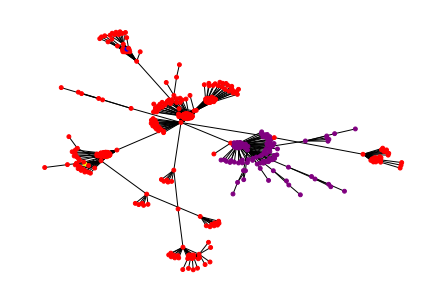

In [28]:
labels = nx.get_node_attributes(G, 'Annotation')

all_annotations = [annotate[1] for annotate in G.nodes.data('Annotation')]
print(set(all_annotations))
c = Counter(all_annotations)
print(c.most_common())

colour_list = []
for node in G.nodes:
    if 'Province_Brandenburg' in labels[node]:
        colour_list.append('blue')
    elif 'Brandenburg' in labels[node]:
        colour_list.append('red')
    elif 'Natchez' in labels[node]:
        colour_list.append('purple')
    elif 'town_Brandenburg_an_der_Havel' in labels[node]:
        colour_list.append('green')
    elif 'Brandenburg_disambiguation' in labels[node]:
        colour_list.append('pink')
    elif 'unknown' in labels[node]:
        colour_list.append('yellow')

nx.draw(G, labels=labels, node_size=15, with_labels=False, node_color = colour_list)

How many disambiguation entities in 6927.tsv

In [7]:
nr_disambiguations = 0
for comment in G.nodes.data('Comment'):
    if 'disambiguation' in comment:
        nr_disambiguations += 1
nr_disambiguations

14

Counting disambiguation for all files in the gold standard

In [8]:
G.clear()

In [9]:
gs = [4170, 5723,6617,6927,9411,9756,11116,12745,14872,18688,25604,33122,37544,
39036, 42616,96073,97757,99932,236350,240577,337339,395175,712342,1133953,
1140988,4635725,9994282,14514123]

In [10]:
for id in gs:
    filename = str(id) +'.tsv'
    filename_edges = str(id) + '_edges.tsv'
    add_nodes(filename)
    #add_edges(filename_edges)
    

Total nr of disambiguation nodes in all files

In [11]:
nr_disambiguations = 0
for comment in G.nodes.data('Comment'):
    if 'disambiguation' in comment:
        nr_disambiguations += 1
nr_disambiguations
#

180

Total nr of nodes

In [12]:
len(G.nodes)

8394

the proportion of disambiguation nodes

In [13]:
nr_disambiguations / len(G.nodes)

0.021443888491779844